# HD211847 1

In [1]:
from mingle.utilities.db_utils import SingleSimReader, DBExtractor, df_contour, df_contour2
import matplotlib.pyplot as plt
%matplotlib inline
from mingle.utilities.param_file import parse_paramfile

# I need to fix the contour plots to let each point be variable for all other parameters.
Not jsut fixed at the minimum chi squared value.

In [2]:
# chi2 = "coadd_chi2"
# chi2 = "chi2_1"
chi2 = "chi2_123"

In [3]:
starname = "HD211847"
obsnums = [1, 2]
rvs = [6.6137, 6.6137]
gammas = [7.171, 7.167]

In [4]:
!cat ~/Desktop/Inbox/a/tuned/paper-HD211847/HD211847.sh 

cat: /home/jneal/Desktop/Inbox/a/tuned/paper-HD211847/HD211847.sh: No such file or directory


In [5]:
correct = parse_paramfile("/home/jneal/Phd/data/parameter_files/HD211847_params.dat")
correct.update({"teff_1":correct["temp"], "teff_2":correct["comp_temp"],
                "logg_1":correct["logg"], "logg_2":correct["comp_logg"],
                "feh_1":correct["fe_h"], "feh_2":correct["comp_fe_h"], "gamma":6.613, "rv":7.169-6.613})
print(correct)
print("Host temp =", correct["temp"], "K,\tEstimated companion =", correct["comp_temp"], "K")

{'name': 'hd 211847', 'companion': 'b', 'mean_val': 6.689, 'k1': 0.2914, 'omega': 159.2, 'eccentricity': 0.685, 'tau': 2462030.1, 'period': 7929.4, 'm_star': 0.94, 'm_sini': 19.2, 'a': 7.5, 'm_true': 155.0, 'spt': 'g5v', 'temp': 5715.0, 'fe_h': -0.08, 'logg': 4.49, 'i': 7.0, 'dist': 50.6, 'age': 3.0, 'comp_temp': 3140.0, 'comp_logg': 5.13, 'comp_fe_h': -0.08, 'source': ['moutou et. al. 2017', 'sahlmann et. al. 2011', 'https://arxiv.org/pdf/1701.05664.pdf'], 'teff_1': 5715.0, 'teff_2': 3140.0, 'logg_1': 4.49, 'logg_2': 5.13, 'feh_1': -0.08, 'feh_2': -0.08, 'gamma': 6.613, 'rv': 0.5559999999999992}
Host temp = 5715.0 K,	Estimated companion = 3140.0 K


# Observation 1 - BHM

########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847/HD211847/bhm for
 HD211847*1*_coadd_bhm_chisqr_results*.db
{'logg_1': 4.5, 'feh_1': 0.0}
(256, 8)


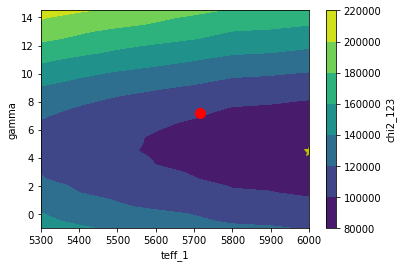

Min Chi2 result for obs= 1
   teff_1  logg_1  gamma  feh_1      chi2_123
0    6000     4.5    4.5    0.0  85803.735519
########################
Observation # 2 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847/HD211847/bhm for
 HD211847*2*_coadd_bhm_chisqr_results*.db
{'logg_1': 4.5, 'feh_1': 0.0}
(256, 8)


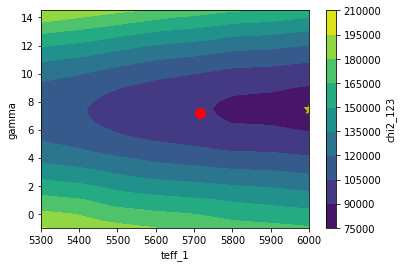

Min Chi2 result for obs= 2
   teff_1  logg_1  gamma  feh_1      chi2_123
0    6000     4.5    7.5    0.0  84546.970886


In [6]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base="/home/jneal/Phd/Analysis/Paper_results/paper-{}".format(starname),
                       name=starname, mode="bhm", suffix="*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())
    
    df_min = extractor.minimum_value_of(chi2)

    cols = ['gamma', chi2, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

  
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["logg_1", "feh_1"], correct=correct, dof=2)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(df_min[["teff_1", "logg_1", "gamma", "feh_1", chi2]].head())


# contour 2 test

########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847/HD211847/bhm for
 HD211847*1*_coadd_bhm_chisqr_results*.db
{'logg_1': 4.5, 'feh_1': 0.0}
(256, 8)
Starting loop at 2018-02-27 09:42:39.416883
256
time to finishd 0:00:00.732603
   teff_1  gamma       chi2_123
0  5300.0   -1.0  114613.929199
1  5300.0   -0.5  113035.838010
2  5300.0    0.0  109788.734782
3  5300.0    0.5  104660.346193
4  5300.0    1.0  101775.579834
grouped df      teff_1  gamma       chi2_123
0      5300   -1.0  149552.243249
1      5300   -0.5  143387.764708
2      5300    0.0  140569.414476
3      5300    0.5  134575.271807
4      5300    1.0  132065.384281
5      5300    1.5  127022.194692
6      5300    2.0  124849.585505
7      5300    2.5  120866.877049
8      5300    3.0  119407.267088
9      5300    3.5  116604.047099
10     5300    4.0  116006.970012
11     5300    4.5  114613.929199
12     5300    5.0  115085.342811
13     5300

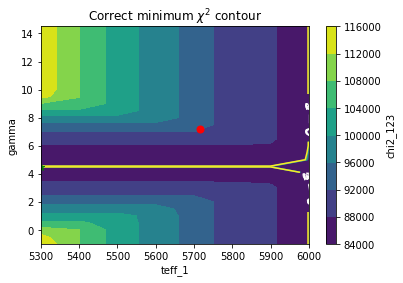

Min Chi2 result for obs= 1
   teff_1  logg_1  gamma  feh_1      chi2_123
0    6000     4.5    4.5    0.0  85803.735519
########################
Observation # 2 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847/HD211847/bhm for
 HD211847*2*_coadd_bhm_chisqr_results*.db
{'logg_1': 4.5, 'feh_1': 0.0}
(256, 8)
Starting loop at 2018-02-27 09:42:40.543653
256
time to finishd 0:00:00.660911
   teff_1  gamma       chi2_123
0  5300.0   -1.0  110945.316457
1  5300.0   -0.5  110945.316457
2  5300.0    0.0  110945.316457
3  5300.0    0.5  110945.316457
4  5300.0    1.0  110945.316457
grouped df      teff_1  gamma       chi2_123
0      5300   -1.0  195625.275833
1      5300   -0.5  187847.591934
2      5300    0.0  183327.979309
3      5300    0.5  174943.675699
4      5300    1.0  170195.537560
5      5300    1.5  162036.151746
6      5300    2.0  156705.987280
7      5300    2.5  149017.254622
8      5300    3.0  143704.733394
9      5300    3.5  136490.1

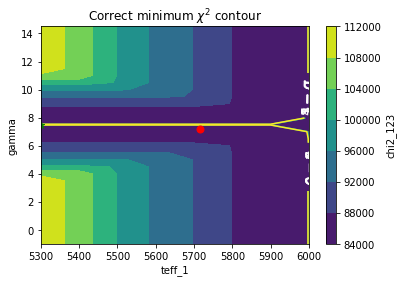

Min Chi2 result for obs= 2
   teff_1  logg_1  gamma  feh_1      chi2_123
0    6000     4.5    7.5    0.0  84546.970886


In [7]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base="/home/jneal/Phd/Analysis/Paper_results/paper-{}".format(starname),
                       name=starname, mode="bhm", suffix="*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())
    
    df_min = extractor.minimum_value_of(chi2)

    cols = ['gamma', chi2, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

  
    df_contour2(df, "teff_1", "gamma", chi2, df_min, ["logg_1", "feh_1"], correct=correct, dof=2)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(df_min[["teff_1", "logg_1", "gamma", "feh_1", chi2]].head())


# Observation 1 - IAM


########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847/HD211847/iam for
 HD211847*1*_coadd_iam_chisqr_results*.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(152320, 12)


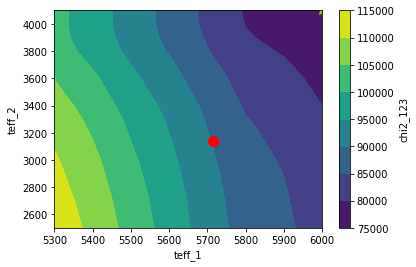

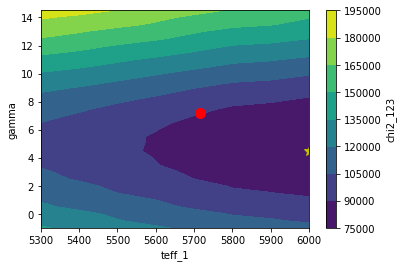

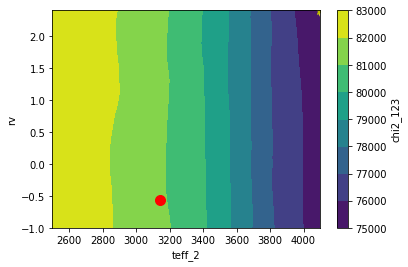

Min Chi2 result for obs= 1
    index  teff_2  logg_2  feh_2  alpha_1  npix_1   rv  gamma      chi2_1  \
0  152300    4100     5.0    0.0   0.0847     844  2.4    4.5  28443.5954   

   arbnorm_1     ...      alpha_4  npix_4      chi2_4  arbnorm_4  coadd_chi2  \
0       1.02     ...       0.0875     763  22409.7729       1.01  97603.7964   

   coadd_npix  teff_1  logg_1  feh_1    chi2_123  
0        3335  6000.0     4.5    0.0  75194.0235  

[1 rows x 28 columns]
########################
Observation # 2 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847/HD211847/iam for
 HD211847*2*_coadd_iam_chisqr_results*.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(152320, 12)


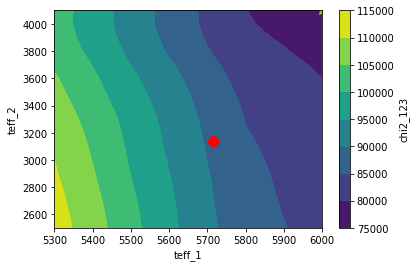

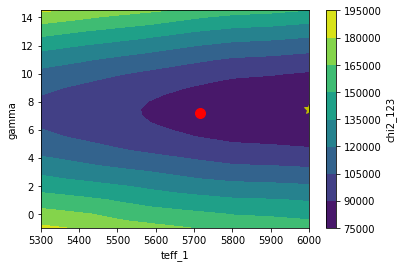

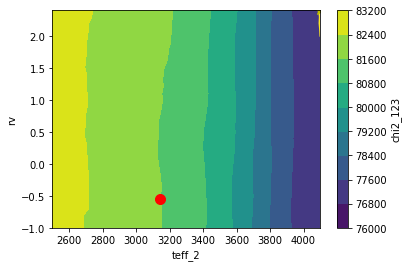

Min Chi2 result for obs= 2
    index  teff_2  logg_2  feh_2  alpha_1  npix_1   rv  gamma      chi2_1  \
0  152306    4100     5.0    0.0   0.0847     829  2.4    7.5  20172.6419   

   arbnorm_1     ...      alpha_4  npix_4      chi2_4  arbnorm_4   coadd_chi2  \
0       1.02     ...        0.087     655  28521.2987       1.01  105267.5298   

   coadd_npix  teff_1  logg_1  feh_1    chi2_123  
0        3160  6000.0     4.5    0.0  76746.2311  

[1 rows x 28 columns]


In [8]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base="/home/jneal/Phd/Analysis/Paper_results/paper-{}".format(starname),
                       name=starname, mode="iam", suffix="*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  


########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847/HD211847/iam for
 HD211847*1*_coadd_iam_chisqr_results*.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(152320, 12)
Starting loop at 2018-02-27 09:42:50.106774
152320
time to finishd 0:00:00.532587
   teff_1  teff_2    chi2_123
0  5300.0  2500.0  82752.6005
1  5300.0  2600.0  82469.8434
2  5300.0  2700.0  82332.1032
3  5300.0  2800.0  82116.6967
4  5300.0  2900.0  81814.8673
grouped df         teff_1  teff_2     chi2_123
0       5300.0    2500  148313.9126
1       5300.0    2500  142376.0745
2       5300.0    2500  139752.9732
3       5300.0    2500  133691.2465
4       5300.0    2500  131054.2653
1120    5300.0    2600  147647.4904
1121    5300.0    2600  141707.5577
1122    5300.0    2600  139103.9342
1123    5300.0    2600  133038.4986
1124    5300.0    2600  130449.4706
2240    5300.0    2700  147251.6525
2241    5300.0    2700  141434.

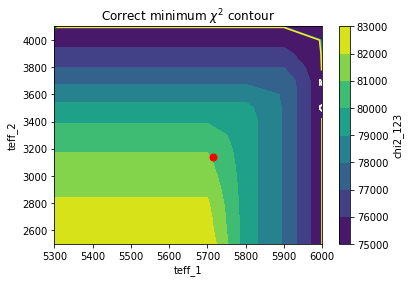

Starting loop at 2018-02-27 09:42:51.353908
152320
time to finishd 0:00:01.279707
   teff_1  gamma     chi2_123
0  5300.0   -1.0  101444.6039
1  5300.0   -0.5  101444.6039
2  5300.0    0.0  100169.6000
3  5300.0    0.5   95032.8152
4  5300.0    1.0   92039.3630
grouped df         teff_1  gamma     chi2_123
0       5300.0   -1.0  148313.9126
1       5300.0   -0.5  142376.0745
2       5300.0    0.0  139752.9732
3       5300.0    0.5  133691.2465
4       5300.0    1.0  131054.2653
5       5300.0    1.5  126136.7310
6       5300.0    2.0  123782.4272
7       5300.0    2.5  119896.5565
8       5300.0    3.0  118222.7365
9       5300.0    3.5  115308.7146
10      5300.0    4.0  114832.4027
11      5300.0    4.5  113289.8139
12      5300.0    5.0  113573.8189
13      5300.0    5.5  113807.6048
14      5300.0    6.0  115245.9050
15      5300.0    6.5  116759.8476
16      5300.0    7.0  119584.5518
17      5300.0    7.5  122716.4439
18      5300.0    8.0  126631.6987
19      5300.0    8.5  1311

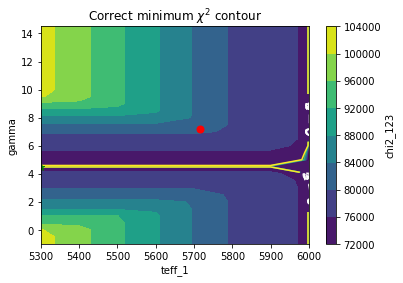

Starting loop at 2018-02-27 09:42:53.434858
152320
time to finishd 0:00:02.319131
   teff_2   rv    chi2_123
0  2500.0 -1.0  75696.1354
1  2500.0 -0.9  75692.2082
2  2500.0 -0.8  75692.4440
3  2500.0 -0.7  75682.1634
4  2500.0 -0.6  75668.4337
grouped df        teff_2   rv     chi2_123
0        2500 -1.0  148313.9126
1        2500 -1.0  142376.0745
2        2500 -1.0  139752.9732
3        2500 -1.0  133691.2465
4        2500 -1.0  131054.2653
32       2500 -0.9  148296.6760
33       2500 -0.9  142354.6014
34       2500 -0.9  139758.2304
35       2500 -0.9  133687.3608
36       2500 -0.9  131040.9953
64       2500 -0.8  148299.9364
65       2500 -0.8  142336.7326
66       2500 -0.8  139765.5710
67       2500 -0.8  133685.1446
68       2500 -0.8  131027.2927
96       2500 -0.7  148297.4202
97       2500 -0.7  142337.4097
98       2500 -0.7  139769.0029
99       2500 -0.7  133687.6508
100      2500 -0.7  131028.5504
128      2500 -0.6  148267.2846
129      2500 -0.6  142341.3432
130      

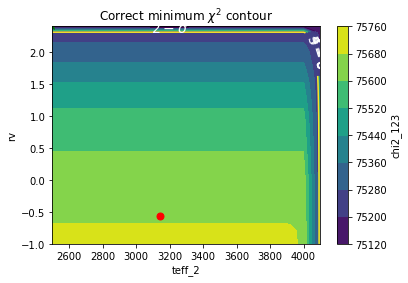

Min Chi2 result for obs= 1
    index  teff_2  logg_2  feh_2  alpha_1  npix_1   rv  gamma      chi2_1  \
0  152300    4100     5.0    0.0   0.0847     844  2.4    4.5  28443.5954   

   arbnorm_1     ...      alpha_4  npix_4      chi2_4  arbnorm_4  coadd_chi2  \
0       1.02     ...       0.0875     763  22409.7729       1.01  97603.7964   

   coadd_npix  teff_1  logg_1  feh_1    chi2_123  
0        3335  6000.0     4.5    0.0  75194.0235  

[1 rows x 28 columns]
########################
Observation # 2 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847/HD211847/iam for
 HD211847*2*_coadd_iam_chisqr_results*.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(152320, 12)
Starting loop at 2018-02-27 09:42:58.101381
152320
time to finishd 0:00:00.600802
   teff_1  teff_2    chi2_123
0  5300.0  2500.0  82768.1502
1  5300.0  2600.0  82535.5959
2  5300.0  2700.0  82364.7005
3  5300.0  2800.0  82152.9818
4  5300.0  2900.0  82034.1124
groupe

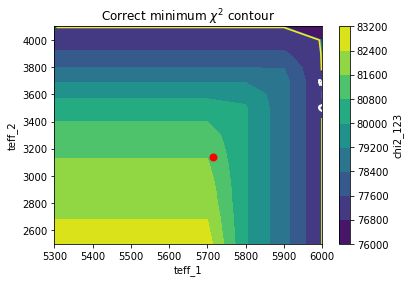

Starting loop at 2018-02-27 09:42:59.435122
152320
time to finishd 0:00:01.209186
   teff_1  gamma     chi2_123
0  5300.0   -1.0  102219.0244
1  5300.0   -0.5  102219.0244
2  5300.0    0.0  102219.0244
3  5300.0    0.5  102219.0244
4  5300.0    1.0  102219.0244
grouped df         teff_1  gamma     chi2_123
0       5300.0   -1.0  196971.8885
1       5300.0   -0.5  188907.3506
2       5300.0    0.0  184539.6098
3       5300.0    0.5  176215.5212
4       5300.0    1.0  171391.9266
5       5300.0    1.5  163050.5267
6       5300.0    2.0  158060.3522
7       5300.0    2.5  150189.7474
8       5300.0    3.0  144957.3036
9       5300.0    3.5  138008.6789
10      5300.0    4.0  133027.4212
11      5300.0    4.5  127037.1242
12      5300.0    5.0  123136.4260
13      5300.0    5.5  118803.4505
14      5300.0    6.0  116087.7920
15      5300.0    6.5  113681.9302
16      5300.0    7.0  112674.7177
17      5300.0    7.5  112440.6997
18      5300.0    8.0  113353.3338
19      5300.0    8.5  1154

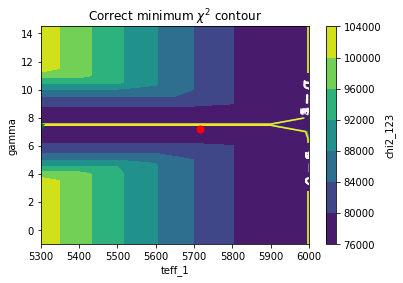

Starting loop at 2018-02-27 09:43:01.410036
152320
time to finishd 0:00:02.233066
   teff_2   rv    chi2_123
0  2500.0 -1.0  76793.4289
1  2500.0 -0.9  76793.7915
2  2500.0 -0.8  76794.0900
3  2500.0 -0.7  76805.2596
4  2500.0 -0.6  76826.1226
grouped df        teff_2   rv     chi2_123
0        2500 -1.0  196971.8885
1        2500 -1.0  188907.3506
2        2500 -1.0  184539.6098
3        2500 -1.0  176215.5212
4        2500 -1.0  171391.9266
32       2500 -0.9  196955.4352
33       2500 -0.9  188913.5411
34       2500 -0.9  184538.9059
35       2500 -0.9  176207.1851
36       2500 -0.9  171403.4018
64       2500 -0.8  196926.3673
65       2500 -0.8  188898.3701
66       2500 -0.8  184519.4628
67       2500 -0.8  176205.2722
68       2500 -0.8  171387.6624
96       2500 -0.7  196901.5467
97       2500 -0.7  188889.0926
98       2500 -0.7  184514.6244
99       2500 -0.7  176213.4526
100      2500 -0.7  171361.8738
128      2500 -0.6  196900.0754
129      2500 -0.6  188887.1061
130      

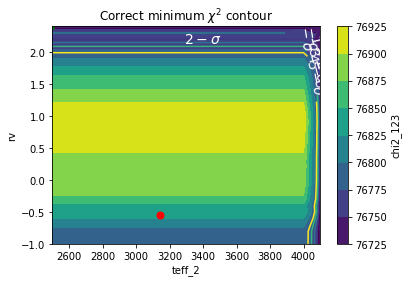

Min Chi2 result for obs= 2
    index  teff_2  logg_2  feh_2  alpha_1  npix_1   rv  gamma      chi2_1  \
0  152306    4100     5.0    0.0   0.0847     829  2.4    7.5  20172.6419   

   arbnorm_1     ...      alpha_4  npix_4      chi2_4  arbnorm_4   coadd_chi2  \
0       1.02     ...        0.087     655  28521.2987       1.01  105267.5298   

   coadd_npix  teff_1  logg_1  feh_1    chi2_123  
0        3160  6000.0     4.5    0.0  76746.2311  

[1 rows x 28 columns]


In [9]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base="/home/jneal/Phd/Analysis/Paper_results/paper-{}".format(starname),
                       name=starname, mode="iam", suffix="*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour2(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour2(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour2(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  


## HD211847 with larger Teff 2 values



In [10]:
base = "/home/jneal/Phd/Analysis/Paper_results/paper-{}_higher-temp".format(starname)

#### Observation 1 - BHM

########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_higher-temp/HD211847/bhm for
 HD211847*1*_coadd_bhm_chisqr_results*bhm2*.db
{'logg_1': 4.5, 'feh_1': 0.0}
(384, 8)


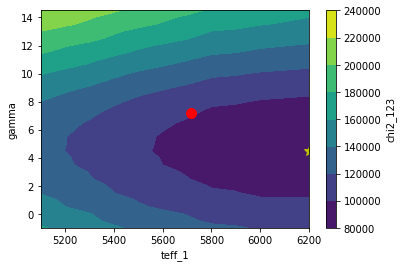

Min Chi2 result for obs= 1
   teff_1  logg_1  gamma  feh_1     chi2_123
0    6200     4.5    4.5    0.0  84670.85085
########################
Observation # 2 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_higher-temp/HD211847/bhm for
 HD211847*2*_coadd_bhm_chisqr_results*bhm2*.db
{'logg_1': 4.5, 'feh_1': 0.0}
(384, 8)


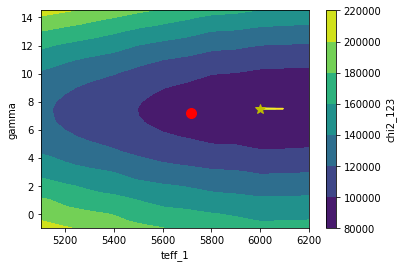

Min Chi2 result for obs= 2
   teff_1  logg_1  gamma  feh_1      chi2_123
0    6000     4.5    7.5    0.0  84546.970886


In [11]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="bhm", suffix="*bhm2*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['gamma', chi2, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

  
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["logg_1", "feh_1"], correct=correct, dof=2)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(df_min[["teff_1", "logg_1", "gamma", "feh_1", chi2]].head())


#### Observation 1 - IAM


########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/iam for
 HD211847*1*_coadd_iam_chisqr_results*_2.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(1094400, 12)


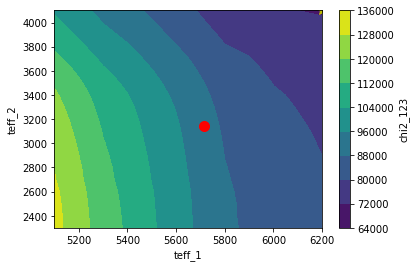

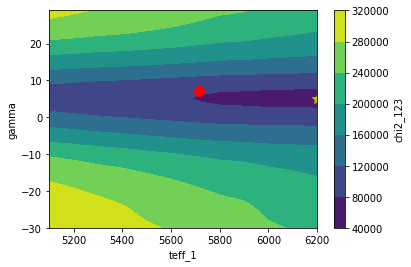

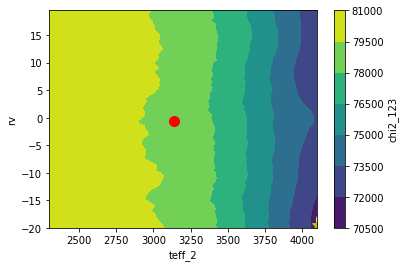

Min Chi2 result for obs= 1
    index  teff_2  logg_2  feh_2  alpha_1  npix_1    rv  gamma      chi2_1  \
0  268896    4100     5.0    0.0   0.0765     844 -19.5      5  29741.2332   

   arbnorm_1    ...      alpha_4  npix_4      chi2_4  arbnorm_4  coadd_chi2  \
0       1.02    ...       0.0797     763  20394.3729       1.01  91895.1189   

   coadd_npix  teff_1  logg_1  feh_1   chi2_123  
0        3335  6200.0     4.5    0.0  71500.746  

[1 rows x 28 columns]
########################
Observation # 2 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/iam for
 HD211847*2*_coadd_iam_chisqr_results*_2.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(1094400, 12)


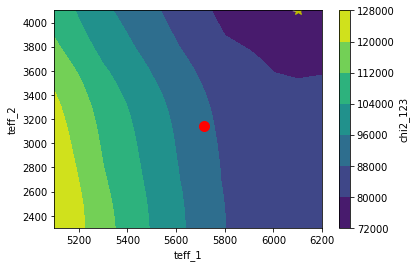

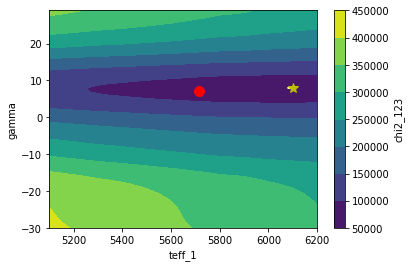

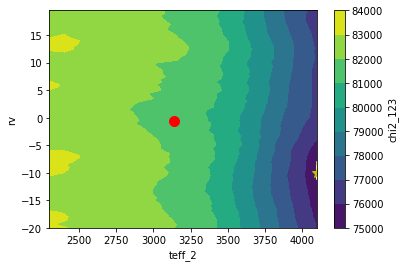

Min Chi2 result for obs= 2
    index  teff_2  logg_2  feh_2  alpha_1  npix_1    rv  gamma      chi2_1  \
0  178839    4100     5.0    0.0   0.0805     829 -10.0      8  20436.6418   

   arbnorm_1     ...      alpha_4  npix_4      chi2_4  arbnorm_4   coadd_chi2  \
0       1.02     ...        0.083     655  27699.8026       1.01  102971.4091   

   coadd_npix  teff_1  logg_1  feh_1    chi2_123  
0        3160  6100.0     4.5    0.0  75271.6065  

[1 rows x 28 columns]


In [22]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="iam", suffix="*_2", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  


# HD 211847 with larger RV span.



In [13]:
base = "/home/jneal/Phd/Analysis/Paper_results/paper-{}_wider_rv".format(starname)

#### Observation 1 - BHM

########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/bhm for
 HD211847*1*_coadd_bhm_chisqr_results*_bhm2.db
{'logg_1': 4.5, 'feh_1': 0.0}
(720, 8)


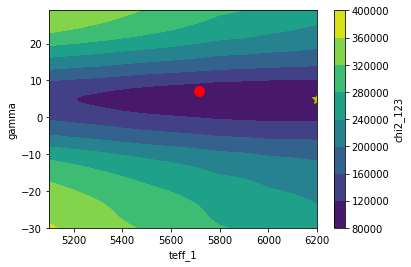

Min Chi2 result for obs= 1
   teff_1  logg_1  gamma  feh_1      chi2_123
0    6200     4.5      5    0.0  84828.752695
########################
Observation # 2 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/bhm for
 HD211847*2*_coadd_bhm_chisqr_results*_bhm2.db
{'logg_1': 4.5, 'feh_1': 0.0}
(720, 8)


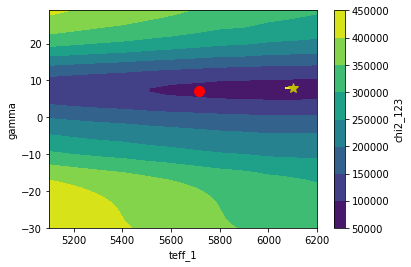

Min Chi2 result for obs= 2
   teff_1  logg_1  gamma  feh_1      chi2_123
0    6100     4.5      8    0.0  84913.901492


In [14]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="bhm", suffix="*_bhm2", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['gamma', chi2, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

  
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["logg_1", "feh_1"], correct=correct, dof=2)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(df_min[["teff_1", "logg_1", "gamma", "feh_1", chi2]].head())


#### Observation 1 - IAM


########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/iam for
 HD211847*1*_coadd_iam_chisqr_results*_2.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(1094400, 12)


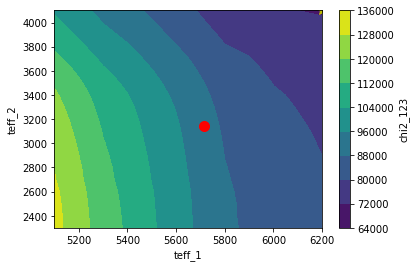

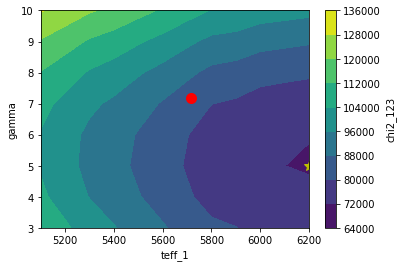

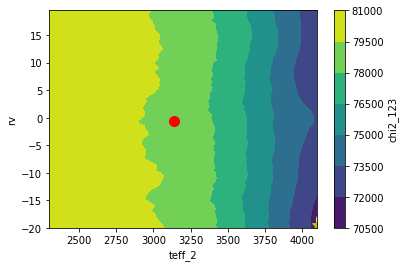

Min Chi2 result for obs= 1
    index  teff_2  logg_2  feh_2  alpha_1  npix_1    rv  gamma      chi2_1  \
0  268896    4100     5.0    0.0   0.0765     844 -19.5      5  29741.2332   

   arbnorm_1    ...      alpha_4  npix_4      chi2_4  arbnorm_4  coadd_chi2  \
0       1.02    ...       0.0797     763  20394.3729       1.01  91895.1189   

   coadd_npix  teff_1  logg_1  feh_1   chi2_123  
0        3335  6200.0     4.5    0.0  71500.746  

[1 rows x 28 columns]
########################
Observation # 2 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/iam for
 HD211847*2*_coadd_iam_chisqr_results*_2.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(1094400, 12)


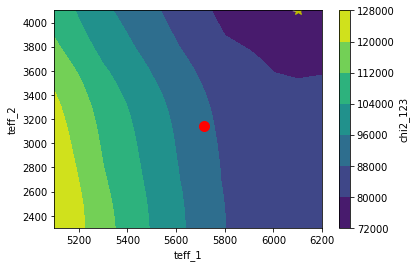

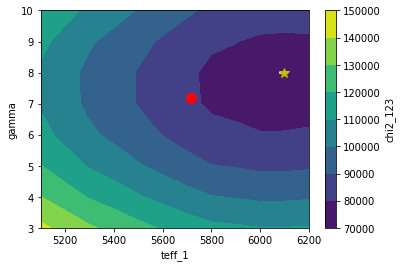

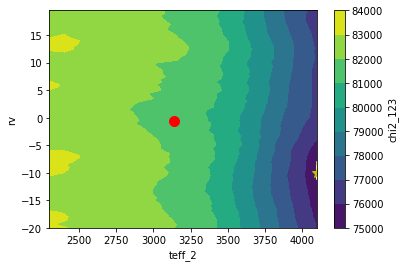

Min Chi2 result for obs= 2
    index  teff_2  logg_2  feh_2  alpha_1  npix_1    rv  gamma      chi2_1  \
0  178839    4100     5.0    0.0   0.0805     829 -10.0      8  20436.6418   

   arbnorm_1     ...      alpha_4  npix_4      chi2_4  arbnorm_4   coadd_chi2  \
0       1.02     ...        0.083     655  27699.8026       1.01  102971.4091   

   coadd_npix  teff_1  logg_1  feh_1    chi2_123  
0        3160  6100.0     4.5    0.0  75271.6065  

[1 rows x 28 columns]


In [23]:
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="iam", suffix="*_2", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, ylim=[3,10], dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  


looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/iam for
 HD211847*2*_coadd_iam_chisqr_results*_2.db


/home/jneal/Phd/Codes/companion_simulations/bin/__init__.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/ipykernel/kern

KeyError: 'star'

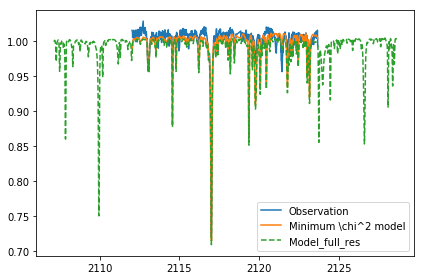

In [16]:
from bin.coadd_analysis_module import compare_spectra_dect1
correct.update({"obs_name":"/home/jneal/.handy_spectra/HD211847-1-mixavg-tellcorr_1_bervcorr_masked.fits"})
compare_spectra_dect1(observation.get_table(), params=correct, save=True, chi2_val="chi2_1", mode="iam")

In [ ]:
!ls ~/.handy_spectra/HD211*-1*_1*mask*



# HD 211847 with even larger RV span.


In [ ]:
#paper-HD211847_even_higher_temp
base = "/home/jneal/Phd/Analysis/Paper_results/paper-{}_even_higher_temp".format(starname)
        /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_even_higher_temp/HD211847/bhm

In [ ]:
#### Observation 1 - BHM
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="bhm", suffix="*_bhm*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['gamma', chi2, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

  
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["logg_1", "feh_1"], correct=correct, dof=2)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(df_min[["teff_1", "logg_1", "gamma", "feh_1", chi2]].head())


########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/iam for
 HD211847*1*_coadd_iam_chisqr_results*[^2]*.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(1094400, 12)


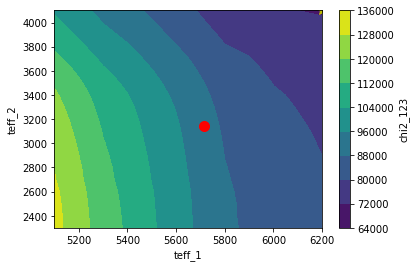

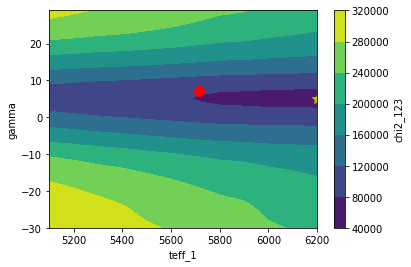

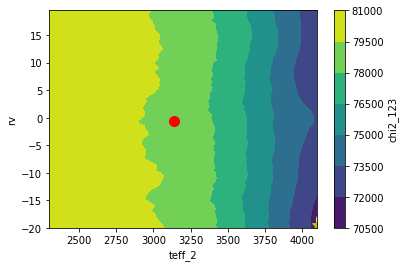

Min Chi2 result for obs= 1
    index  teff_2  logg_2  feh_2  alpha_1  npix_1    rv  gamma      chi2_1  \
0  268896    4100     5.0    0.0   0.0765     844 -19.5      5  29741.2332   

   arbnorm_1    ...      alpha_4  npix_4      chi2_4  arbnorm_4  coadd_chi2  \
0       1.02    ...       0.0797     763  20394.3729       1.01  91895.1189   

   coadd_npix  teff_1  logg_1  feh_1   chi2_123  
0        3335  6200.0     4.5    0.0  71500.746  

[1 rows x 28 columns]
########################
Observation # 2 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/iam for
 HD211847*2*_coadd_iam_chisqr_results*[^2]*.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(1094400, 12)


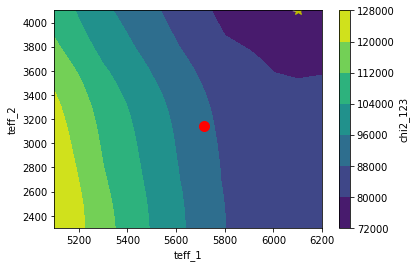

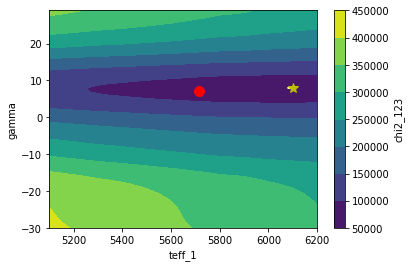

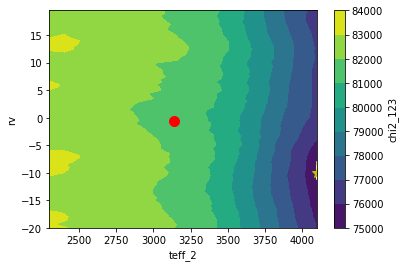

Min Chi2 result for obs= 2
    index  teff_2  logg_2  feh_2  alpha_1  npix_1    rv  gamma      chi2_1  \
0  178839    4100     5.0    0.0   0.0805     829 -10.0      8  20436.6418   

   arbnorm_1     ...      alpha_4  npix_4      chi2_4  arbnorm_4   coadd_chi2  \
0       1.02     ...        0.083     655  27699.8026       1.01  102971.4091   

   coadd_npix  teff_1  logg_1  feh_1    chi2_123  
0        3160  6100.0     4.5    0.0  75271.6065  

[1 rows x 28 columns]


In [21]:
#### Observation 1 - IAM
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="iam", suffix="*[^2]*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  


In [17]:
#### Observation 1 - IAM
for i, obs in enumerate(obsnums):
    correct.update({"gamma": gammas[i], "rv": rvs[i]-gammas[i]})
    print("########################\nObservation #", obs, "\n########################")
    observation = SingleSimReader(base=base,
                       name=starname, mode="iam", suffix="*", obsnum=obs)

    extractor = DBExtractor(observation.get_table())

    df_min = extractor.minimum_value_of(chi2)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
                chi2, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
    
    
    df_contour2(df, "teff_1", "teff_2", chi2, df_min, ["gamma", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour2(df, "teff_1", "gamma", chi2, df_min, ["teff_2", "rv"], correct=correct, dof=4)
    plt.show()
    df_contour2(df, "teff_2", "rv", chi2, df_min, ["gamma", "teff_1"], correct=correct, dof=4)
    plt.show()
    print("Min Chi2 result for obs=", obs)
    print(extractor.minimum_value_of(chi2).head())
  


########################
Observation # 1 
########################
looking in  /home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/iam for
 HD211847*1*_coadd_iam_chisqr_results*.db
check number of databases found (should be 1)
['/home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/iam/HD211847-1_coadd_iam_chisqr_results_lin_paper_2.db', '/home/jneal/Phd/Analysis/Paper_results/paper-HD211847_wider_rv/HD211847/iam/HD211847-1_coadd_iam_chisqr_results_lin_paper_.db'] 2


AssertionError: len(dbs)=2 not 1

# Wavemasked contours

